<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#General-instructions-for-cython" data-toc-modified-id="General-instructions-for-cython-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>General instructions for cython</a></span><ul class="toc-item"><li><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#distutils" data-toc-modified-id="distutils-1.0.0.1"><span class="toc-item-num">1.0.0.1&nbsp;&nbsp;</span>distutils</a></span></li></ul></li></ul></li></ul></li><li><span><a href="#Cython-notebook" data-toc-modified-id="Cython-notebook-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cython notebook</a></span><ul class="toc-item"><li><span><a href="#Example-1)--fibonnachi" data-toc-modified-id="Example-1)--fibonnachi-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Example 1)  fibonnachi</a></span><ul class="toc-item"><li><span><a href="#Annotations-in-cython" data-toc-modified-id="Annotations-in-cython-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Annotations in cython</a></span></li></ul></li><li><span><a href="#Example-2)--Find-divisors" data-toc-modified-id="Example-2)--Find-divisors-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Example 2)  Find divisors</a></span></li><li><span><a href="#For-loop-counting" data-toc-modified-id="For-loop-counting-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>For loop counting</a></span></li></ul></li></ul></div>

In [1]:
%load_ext cython

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%load_ext cython
%timeit

import Cython
import os
import subprocess
import matplotlib
matplotlib.style.use('ggplot')
import pandas

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


# General instructions for cython

#### distutils

Python standard library includes the `distutils` package for building packaging and distributing python projects. We will use `distutils` for compiling C source into an extension module. We will not directly write C code. We will use `Cython` to generate C code for us. Then the c code will be compiled to an extension module using `distutils.core.setup`.

Let us assume we have written a `Cython` function 'some_function.pyx'. Then the following code is compiles the Cython function to C.

```
from distutils.core import setup
from Cython.Build import cythonize

setup(ext_modules=cythonize('some_function.pyx')
```

We can put the previous code into a file `setup_cy.py` and run in the terminal

```
python setup_cy.py build_ext --inplace
```
Notice that:
- the `build_ext` argument is an standard `distutils` argument to build the `Extension` object (or objects) that the `cythonize` command inside `setup_cy.py` created.


# Cython notebook

To use cython code inisde a cell use the ``%%cython`` marker to compile it.

## Example 1)  fibonnachi

In [93]:
%%cython 
def cy_fib(int n):
    cdef int i
    cdef double a=0.0, b=1.0
    for i in range(n):
        a, b = a + b, a
    return a

In [6]:
cy_fib

<function _cython_magic_6e5f0f455f41a123d4df3a7cb599f204.cy_fib>

In [7]:
def fib(n):
    a = 0
    b = 1
    for i in range(n):
        a, b = a + b, a
    return a

In [8]:
fib(10)

55

In [9]:
cy_fib(10)

55.0

In [10]:
%timeit cy_fib(1000)

1.18 µs ± 10 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [11]:
%timeit fib(1000)

79.8 µs ± 6.12 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [12]:
df_time = pandas.DataFrame({"python_fib":[73.6],
                            "cython_fib":[1.13]})

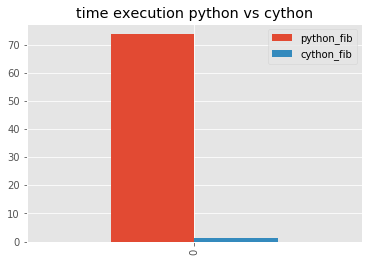

In [13]:
df_time.plot(kind='bar', title="time execution python vs cython")

### Annotations in cython

You can show Cython’s code analysis by passing the --annotate option:

In [92]:
%%cython --annotate

def cy_fib(int n):
    cdef int i
    cdef double a=0.0, b=1.0
    for i in range(n):
        a, b = a + b, a
    return a

## Example 2)  Find divisors


In [27]:
import math

def all_divisors(x):
    divisors = []
    for i in range(1,x//2+1):
        if x%i ==0:
            divisors.append(i)
    
    return divisors


In [28]:
%timeit all_divisors(10000)

364 µs ± 23.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [30]:
%%cython

def cy_all_divisors(int x):
    cdef int i    
    divisors = []
    
    for i in range(1,x//2+1):
        if x%i ==0:
            divisors.append(i)
    
    return divisors

In [31]:
%timeit cy_all_divisors(10000)

24.8 µs ± 490 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [33]:
%%cython --annotate

def cy_all_divisors(int x):
    cdef int i    
    divisors = []
    
    for i in range(1,x//2+1):
        if x%i ==0:
            divisors.append(i)
    
    return divisors

## For loop counting

In [296]:
import numpy as np

np.random.seed(1234)
vec = np.random.randint(0,5,10000)

In [297]:
def summing(vec):
    total = 0
    for x in vec:
        total+=x
    return total

In [298]:
%%time
summing(vec)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 2.3 ms


20146

In [310]:
%%cython --annotate

def cy_summing1(long[:] vec):
    
    cdef long total = 0;
    cdef int i;
    cdef int len_vec = len(vec)
    
    for i in range(len_vec):
        total += vec[i]

    return total

In [311]:
%%time
cy_summing1(vec)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 48.9 µs


20146